# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

# Goals of the case study

There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Import Libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing lead dataset
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Inspection 

In [3]:
# checking the shape of the data 
lead_data.shape

(9240, 37)

In [4]:
# checking non null count and datatype of the variables
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

From above, we can see that all dtypes are correct and we have nulls/missing values present in the data.

In [5]:
# Describing data
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning 

In the data, we can see "select" which means the customer didnot select any option provided while filling the form.
So, it can be replaced with Null

In [6]:
# Converting 'Select' values to NaN.
lead_data = lead_data.replace('Select', np.nan)

In [7]:
# checking the columns for null values
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
#Calculating Null percentage
null_percentage = round(lead_data.isnull().sum()/len(lead_data.index),2)*100
null_percentage

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [9]:
#Removing the columns where null percentage is greater than 40%
columns_to_drop = null_percentage[null_percentage > 40].index
lead_data = lead_data.drop(columns=columns_to_drop)

In [10]:
#Rechecking nulls
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [11]:
#Column "Specialization" have 37% missing values
lead_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

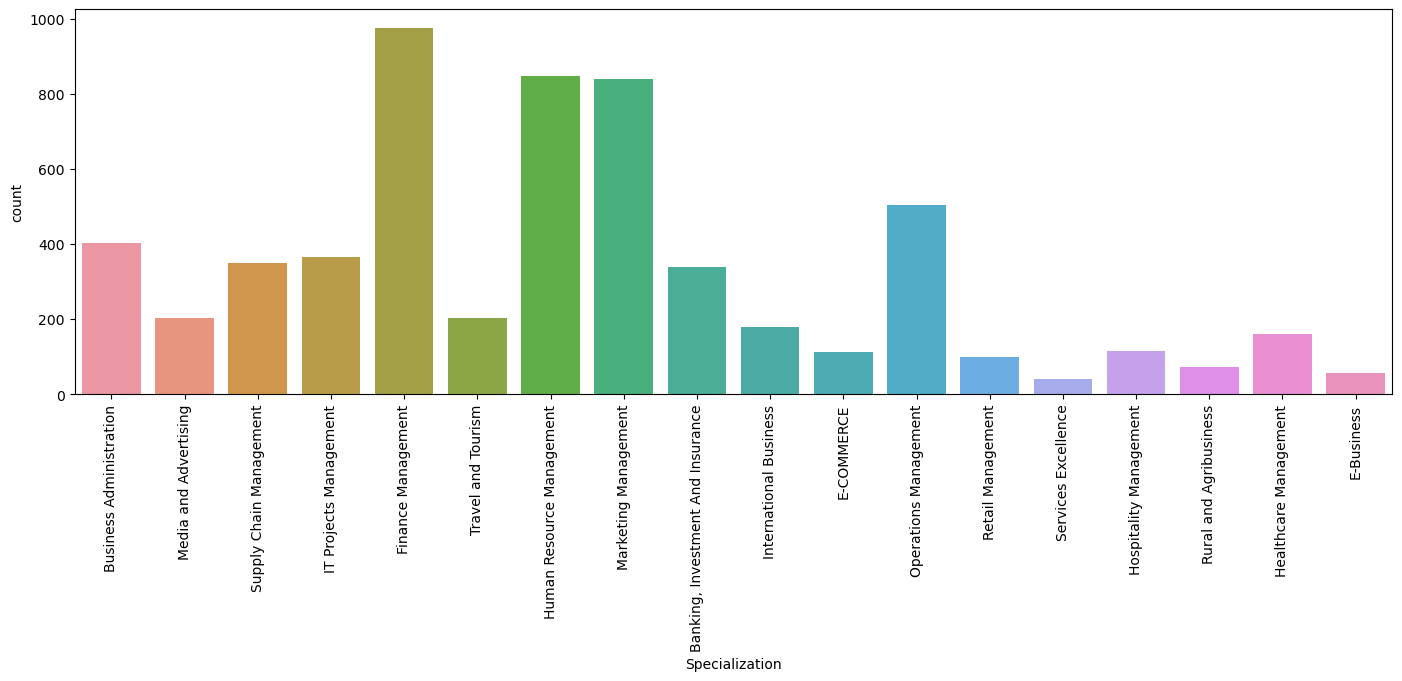

In [12]:
#Visualizing Specialization column
plt.figure(figsize=(17, 5))
sns.countplot(x='Specialization', data=lead_data)
plt.xticks(rotation=90)
plt.show()

There is 37% missing values present in the Specialization column .It may be possible that the lead may leave this column blank if he may be a student or not having any specialization or his specialization is not there in the options given. So we can create a another category 'Others' for this.

In [13]:
# Creating a separate category called 'Others' for this 
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

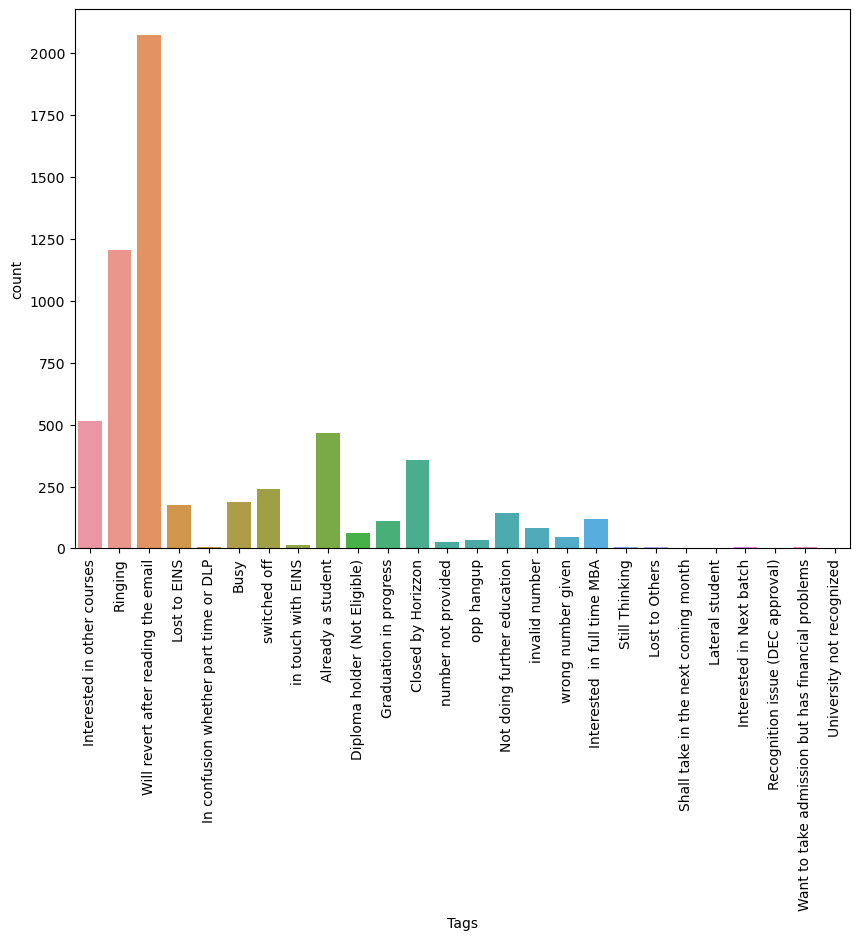

In [14]:
#There is 36% missing values present in the Tags column
# Visualizing Tags column
plt.figure(figsize=(10,7))
sns.countplot(x='Tags', data=lead_data)
plt.xticks(rotation=90)
plt.show()

In [15]:
#Since most of the responses are "will revert after reading the mail", we can impute missing values with this.
# Imputing the missing data in the tags column with 'Will revert after reading the email'
lead_data['Tags']=lead_data['Tags'].replace(np.nan,'Will revert after reading the email')

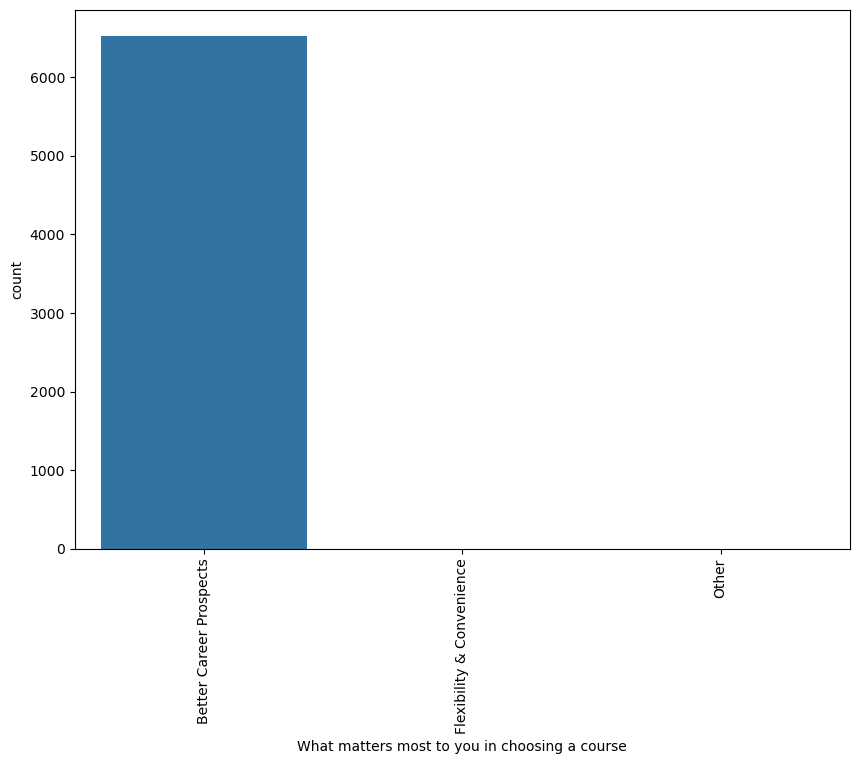

In [16]:
#There is 29% missing values present in the "What matters most to you in choosing a course" column
# Visualizing the column
plt.figure(figsize=(10,7))
sns.countplot(x='What matters most to you in choosing a course', data=lead_data)
plt.xticks(rotation=90)
plt.show()

We can see that this is highly skewed column so we can remove this column.

In [17]:
# Dropping this column 
lead_data=lead_data.drop('What matters most to you in choosing a course',axis=1)

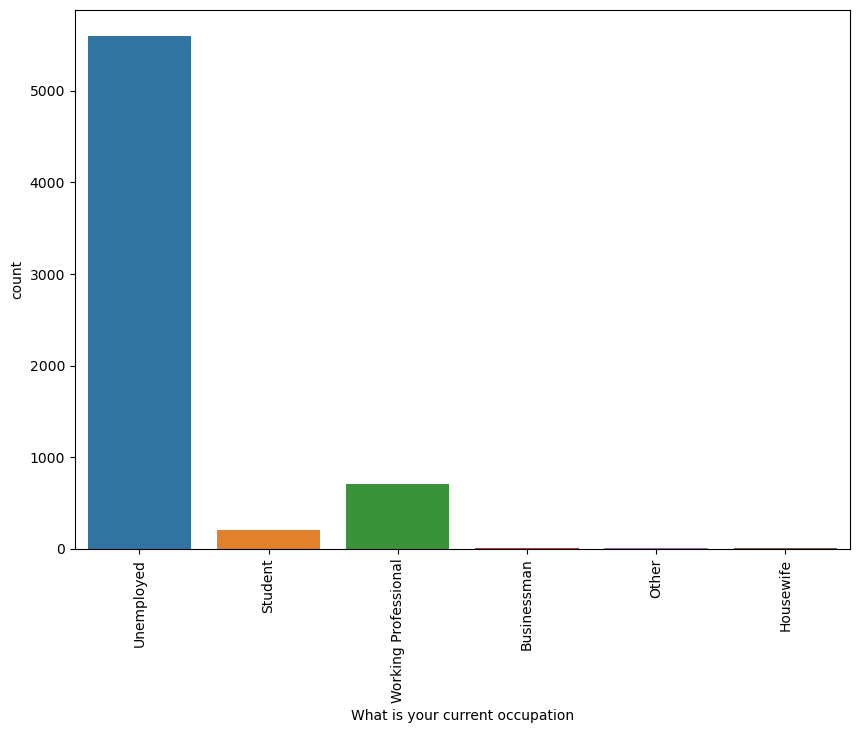

In [18]:
#There is 29% missing values present in the "What is your current occupation" column
# Visualizing the column
plt.figure(figsize=(10,7))
sns.countplot(x='What is your current occupation', data=lead_data)
plt.xticks(rotation=90)
plt.show()

Since the most values are 'Unemployed' , we can impute missing values in this column with this value.

In [19]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed'
lead_data['What is your current occupation']=lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

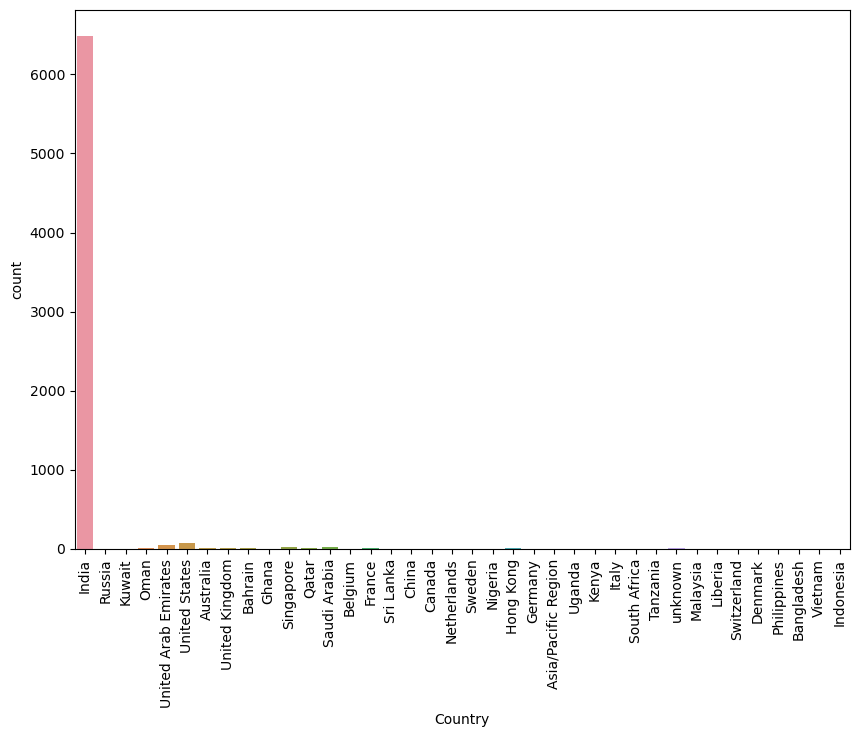

In [20]:
#There is 27% missing values present in the "Country" column
# Visualizing the column
plt.figure(figsize=(10,7))
sns.countplot(x='Country', data=lead_data)
plt.xticks(rotation=90)
plt.show()

Since most values are 'India' , we can impute missing values in this column with this value.

In [21]:
lead_data['Country']=lead_data['Country'].replace(np.nan,'India')

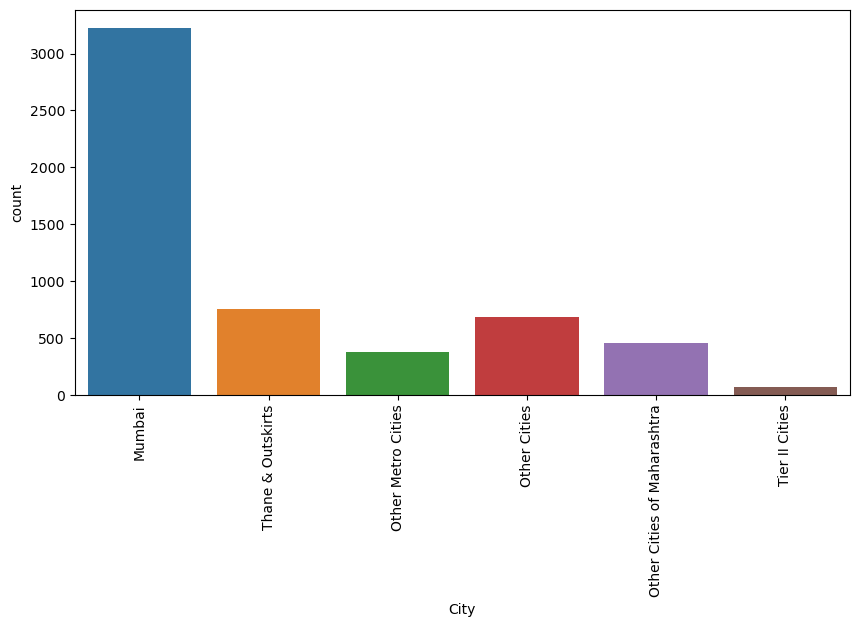

In [22]:
#There is 40% missing values present in the "City" column
# Visualizing the column
plt.figure(figsize=(10,5))
sns.countplot(x='City', data=lead_data)
plt.xticks(rotation=90)
plt.show()

Since most values are 'Mumbai' , we can impute missing values in this column with this value.

In [23]:
# Imputing the missing data in the 'City' column with 'Mumbai'
lead_data['City']=lead_data['City'].replace(np.nan,'Mumbai')

In [24]:
#Rechecking nulls
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [25]:
#Nulls less than 2%, dropping them
lead_data.dropna(inplace = True)

In [26]:
#Rechecking nulls
round(lead_data.isnull().sum()/len(lead_data.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [27]:
# Get the value counts of all the columns

for column in lead_data:
    print(lead_data[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
___________________________________________________
579533    1
630088    1
630039    1
630041    1
630042    1
         ..
602403    1
602402    1
602392    1
602388    1
660737    1
Name: Lead Number, Length: 9074, dtype: int64
___________________________________________________
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
__________________________________________________

Based on above value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque,What matters most to you in choosing a course. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [28]:
lead_data.drop(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [29]:
lead_data.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [30]:
# Let's look at the dataset again

lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


 Prospect ID and Lead Number won't be of any use in the analysis, so we will drop these two variables.

In [31]:
lead_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [32]:
lead_data.shape

(9074, 16)

In [33]:
#Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0)
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

Lead conversion percentage is around 38%

<Figure size 1500x600 with 0 Axes>

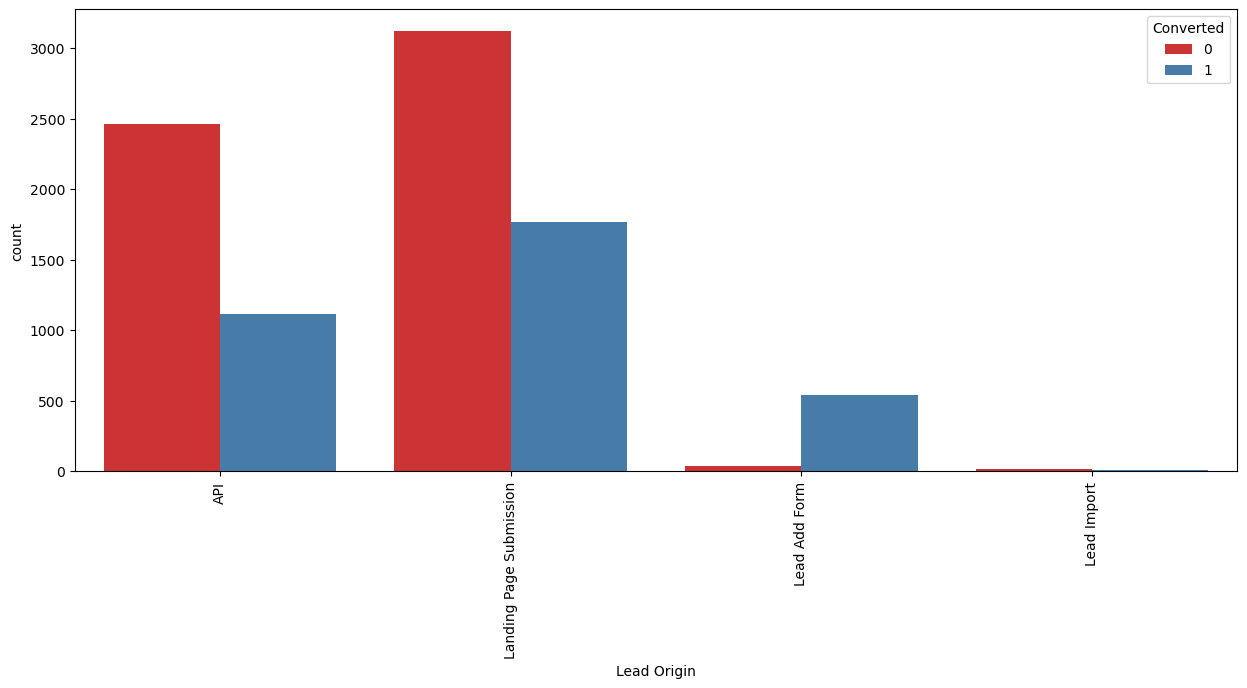

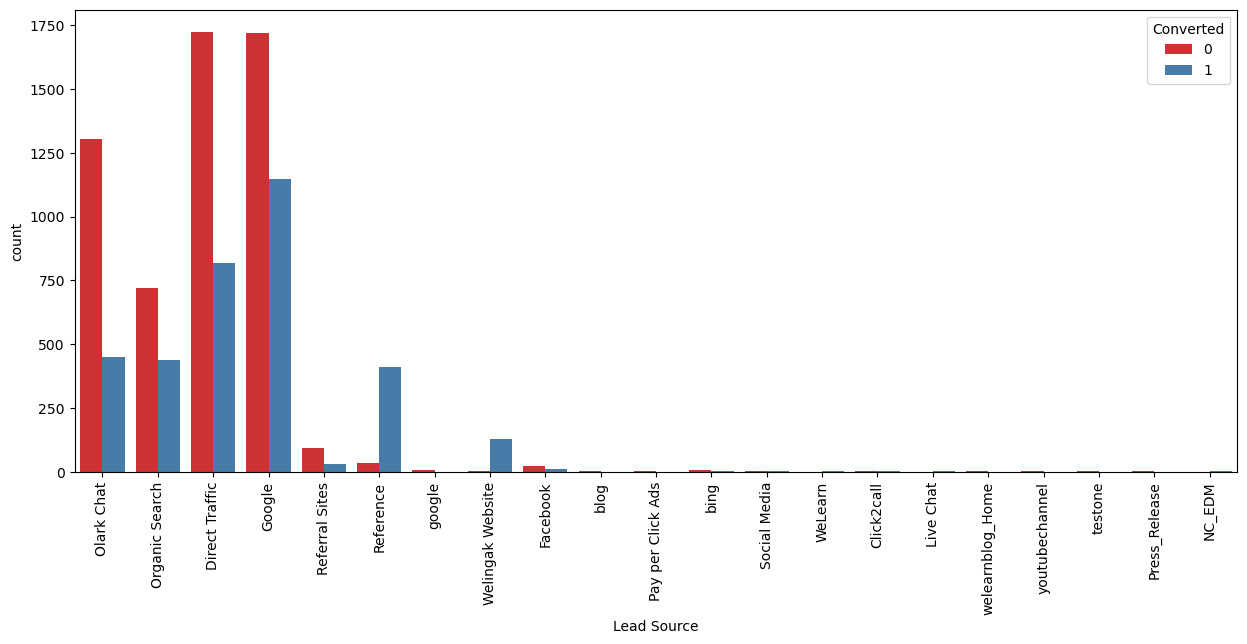

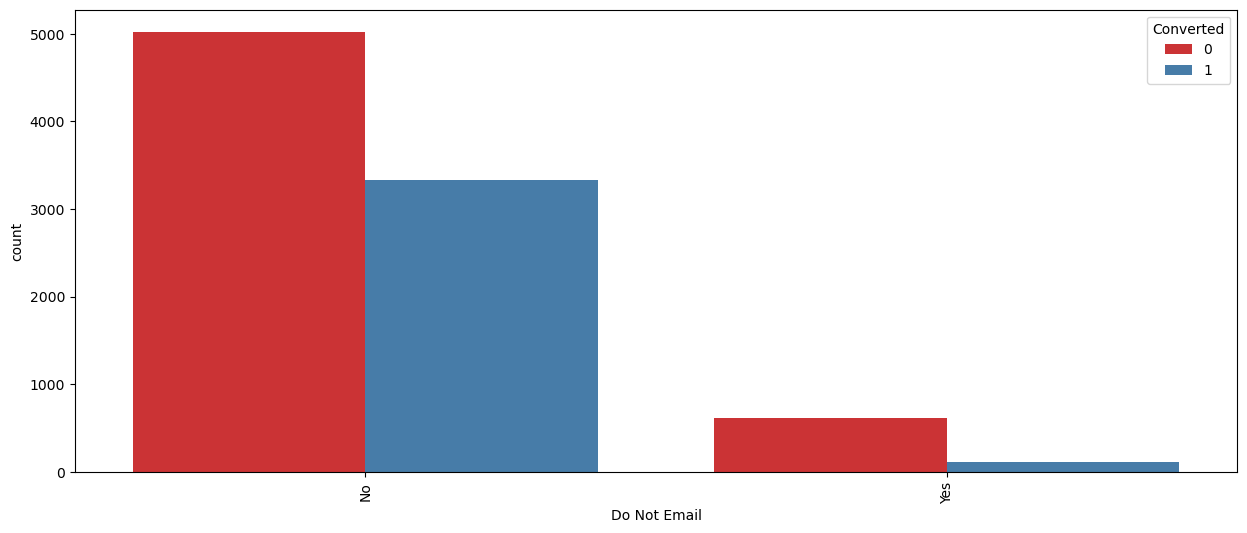

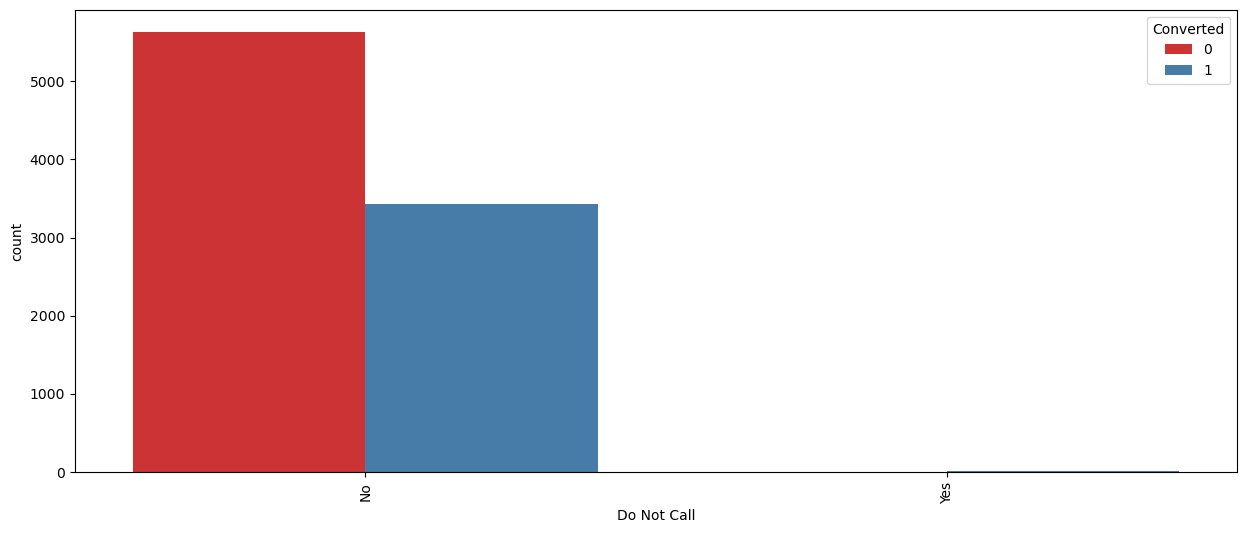

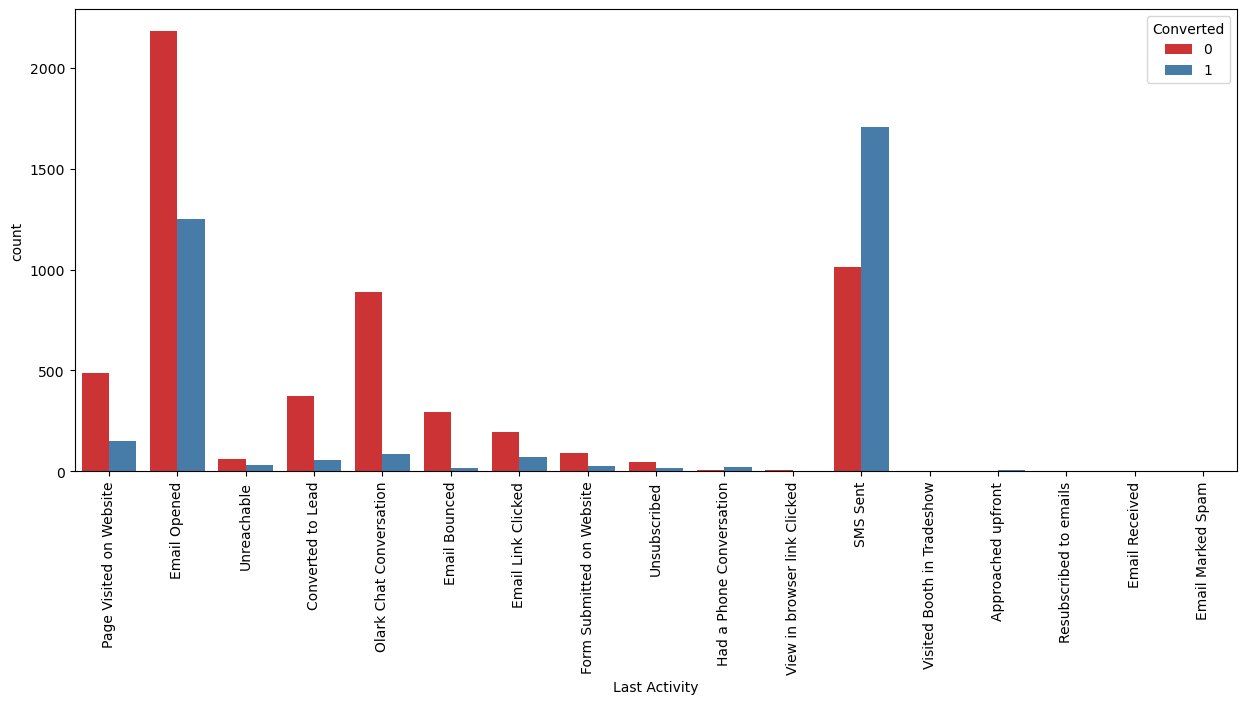

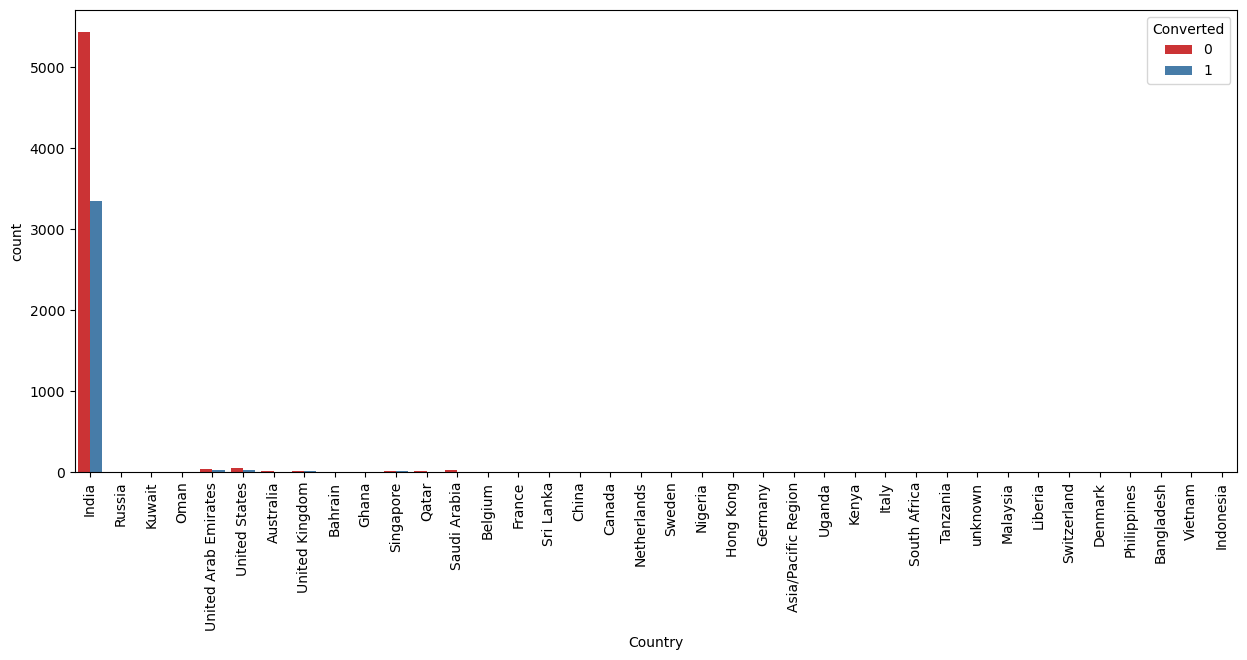

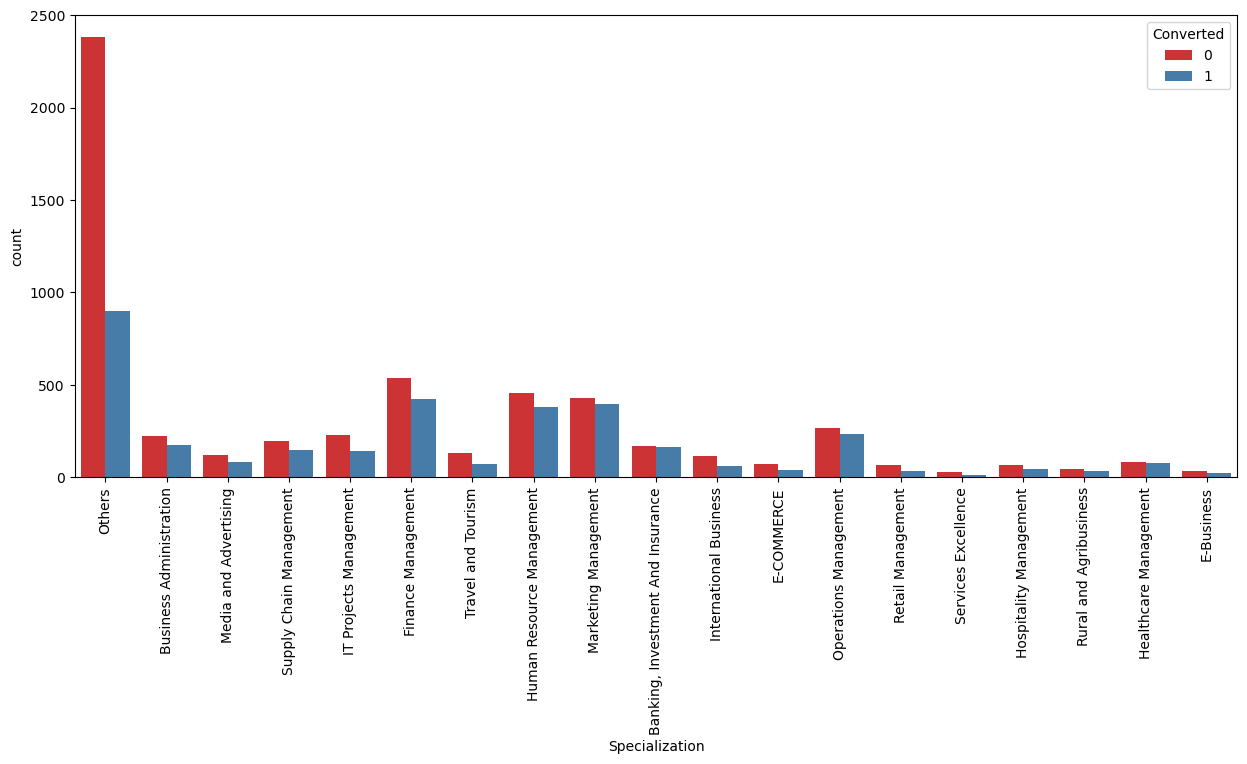

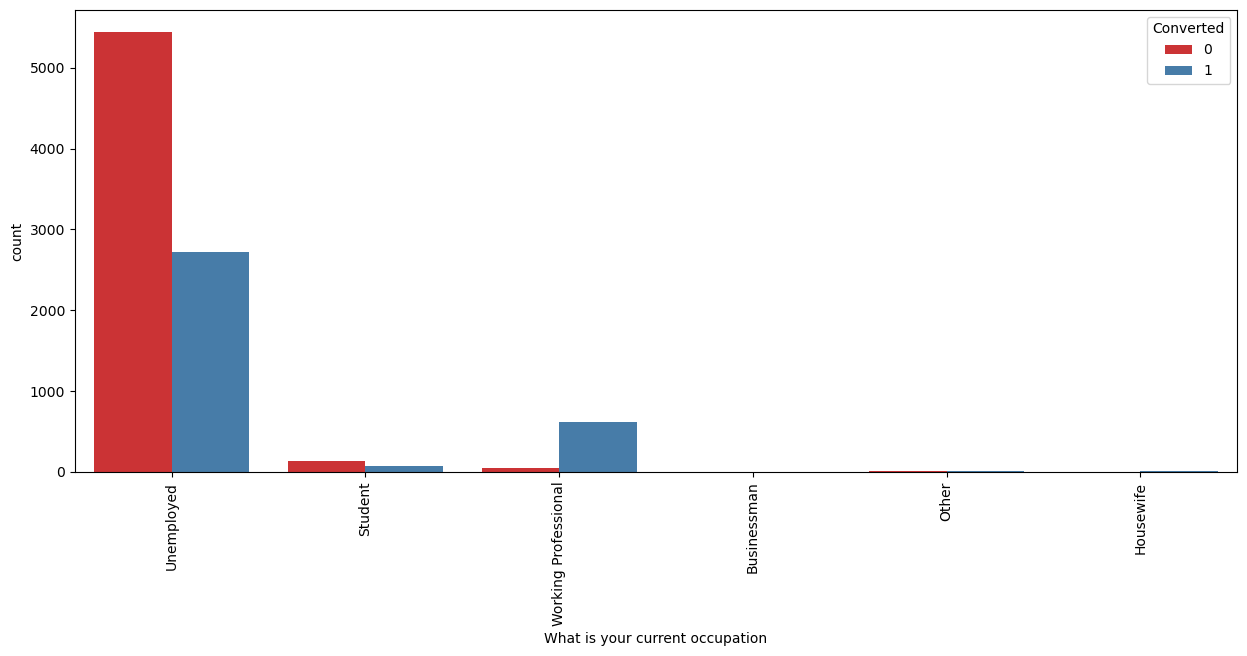

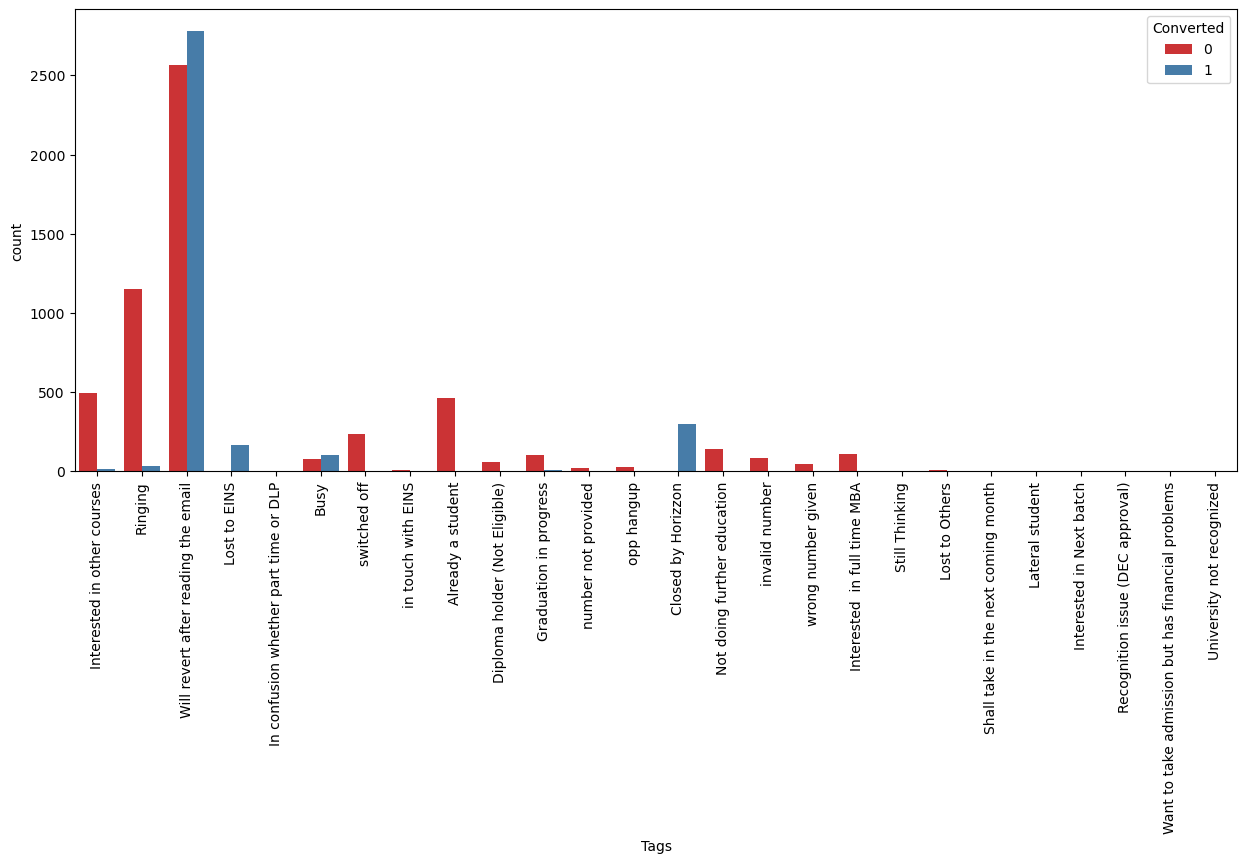

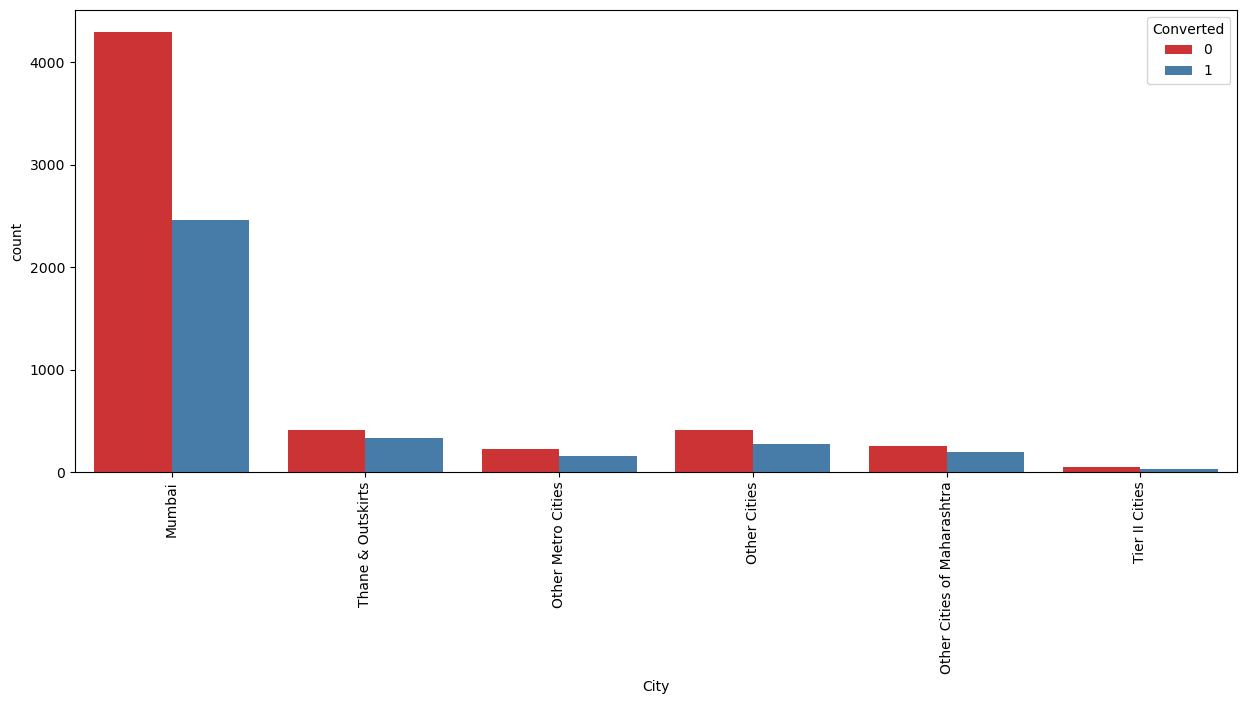

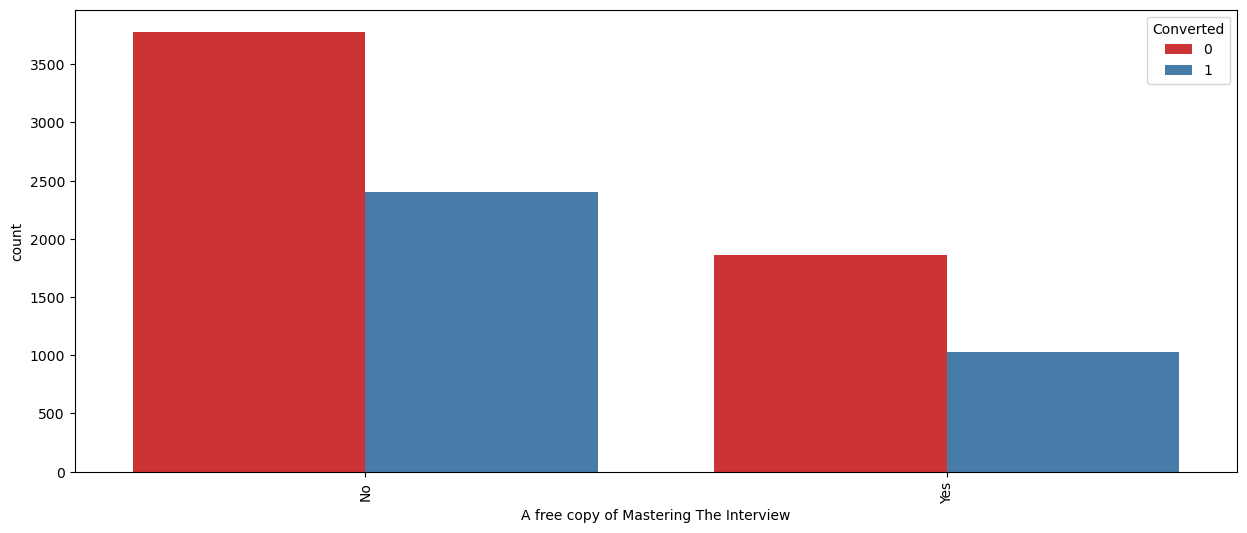

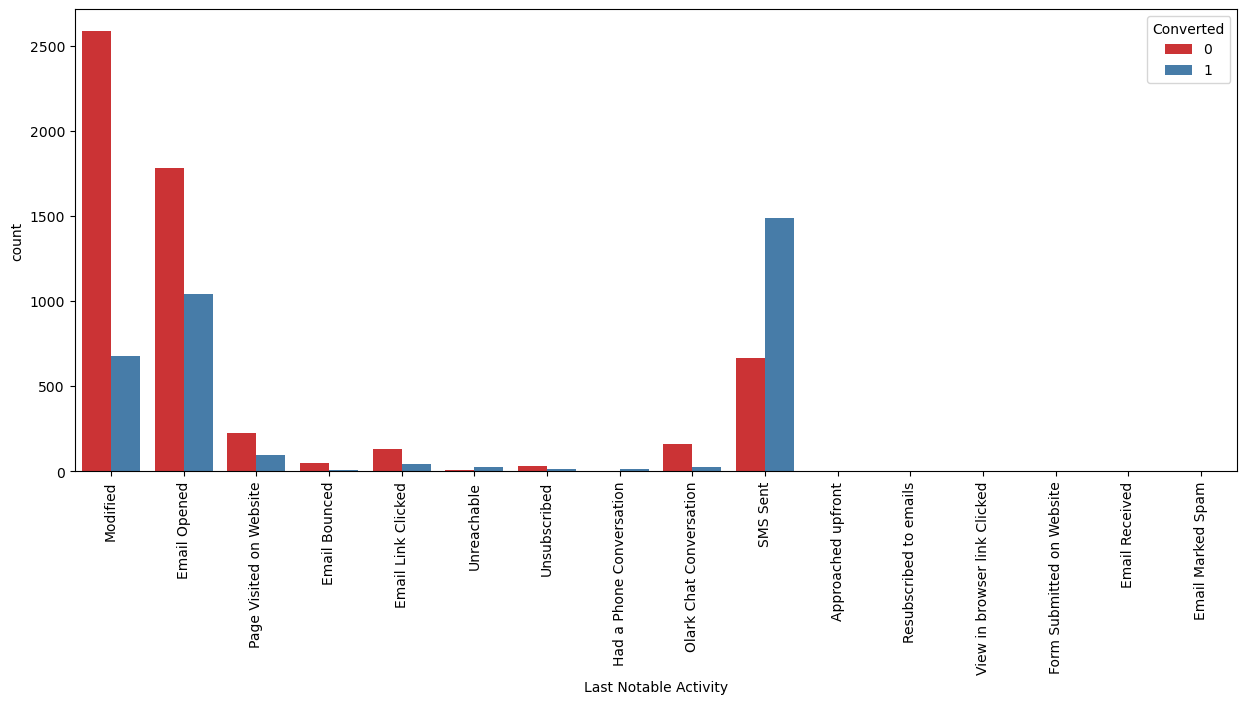

In [34]:
# Plotting all categorical columns vs count for converted 0 or 1
plt.figure(figsize=(15, 6))

# Iterate through each column in the DataFrame
for column in lead_data.columns:
    if lead_data[column].dtype == 'O':  # Check if the column is of object type (categorical)
        plt.figure(figsize=(15, 6))
        sns.countplot(x=column, hue='Converted', data=lead_data, palette='Set1')
        plt.xticks(rotation=90)
        plt.show()

Lead Origin

1.API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.

2.Lead Add Form has more than 90% conversion rate but count of lead are not very high.

3.Lead Import are very less in count.
    
    To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

Lead Source

1.Google and Direct traffic generates maximum number of leads.

2.Conversion Rate of reference leads and leads through welingak website is high.

Don't email and Don't call

Most entries are 'No'. No Inference can be drawn with these parameters.

Last Activity

1.Most of the lead have their Email opened as their last activity.

Country

Most values are 'India' no such inference can be drawn

Specialization

Focus should be more on the Specialization with high conversion rate.

What is your current occupation

1.Working Professionals going for the course have high chances of joining it.

2.Unemployed leads are the most in numbers 

City

Most leads are from mumbai with around 50% conversion rate.

A free copy of Mastering the interview

Most entries are 'No'. No Inference can be drawn with this parameter.

Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [35]:
lead_data = lead_data.drop(['Tags','Country',
                            'A free copy of Mastering The Interview'],1)

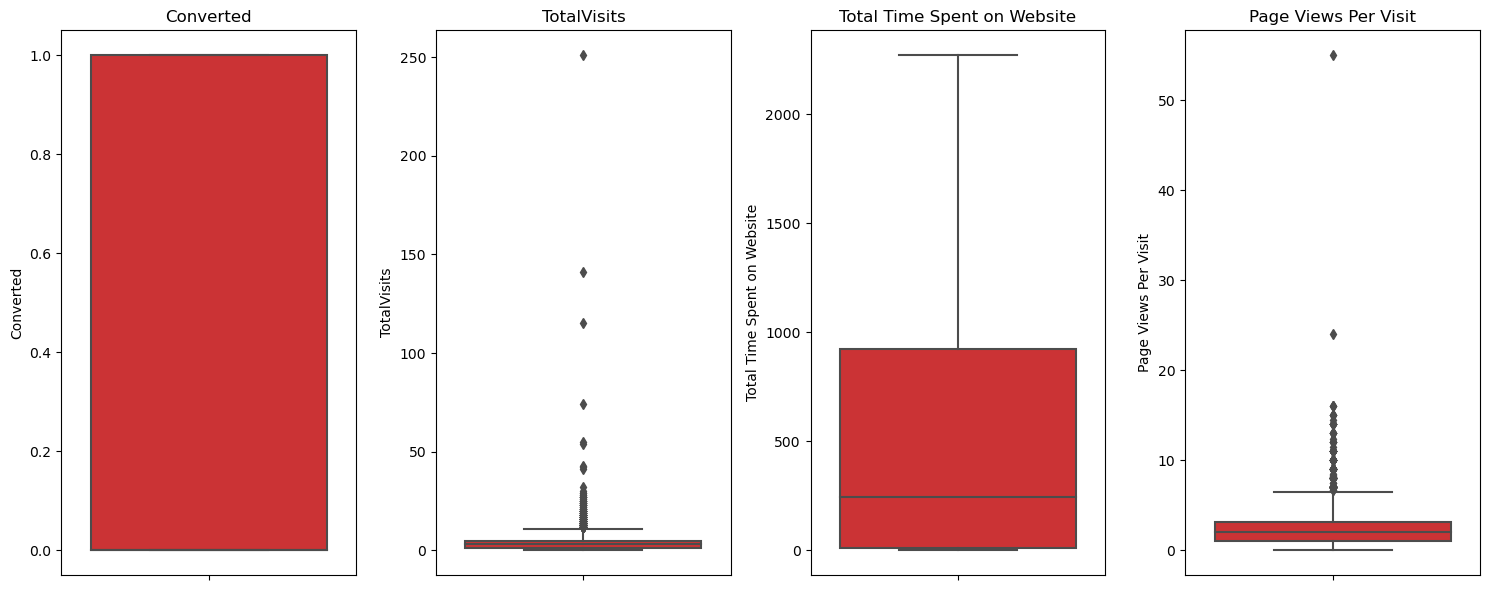

In [36]:
#Coming to the visualization of Numerical columns ["Total visits, Total time spent on Website,Page views per visit"]

numerical_columns = lead_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 6))

for column in numerical_columns:
    plt.subplot(1, len(numerical_columns), list(numerical_columns).index(column) + 1)
    sns.boxplot(y=lead_data[column], palette='Set1')
    plt.title(column)

plt.tight_layout()
plt.show()

In [37]:
#to handle outliers in the 'TotalVisits' column by capping extreme values at the 5th and 95th percentiles. 

percentiles = lead_data['TotalVisits'].quantile([0.05,0.95]).values
lead_data['TotalVisits'][lead_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_data['TotalVisits'][lead_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [38]:
percentiles = lead_data['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_data['Page Views Per Visit'][lead_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

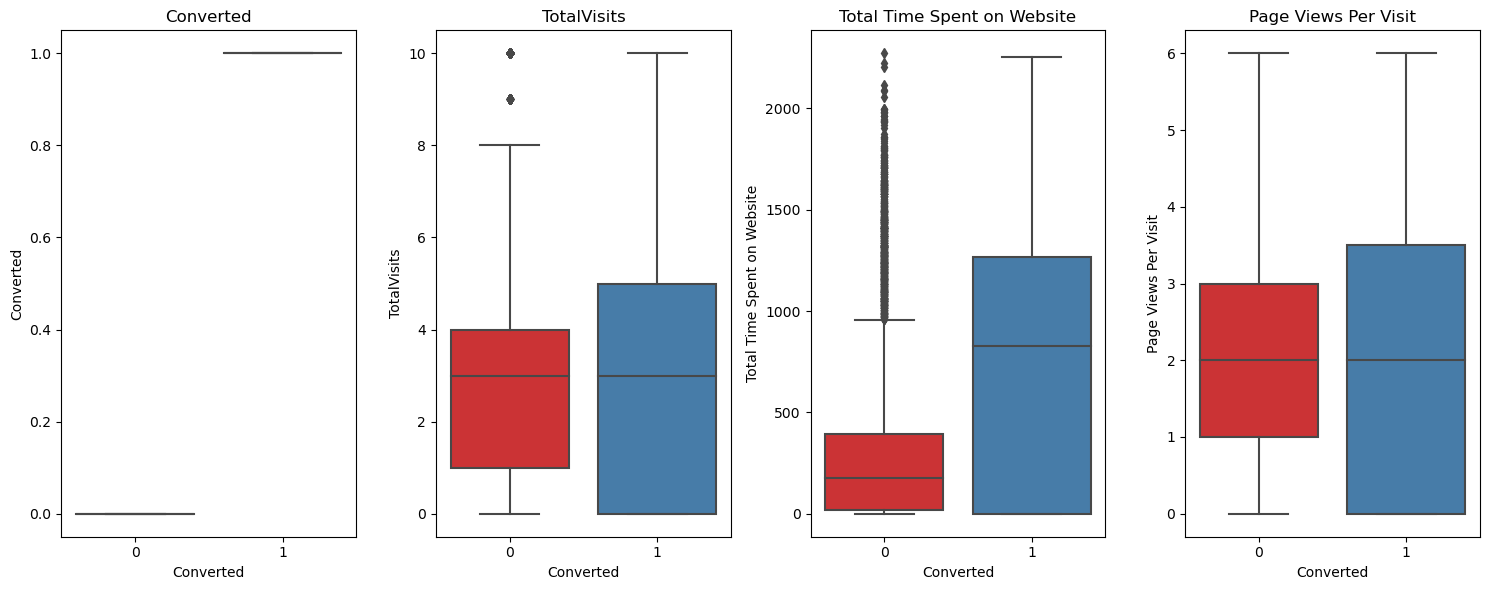

In [39]:
numerical_columns = lead_data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(x='Converted', y=lead_data[column], data=lead_data, palette='Set1')
    plt.title(column)

plt.tight_layout()
plt.show()

1.Median for converted and not converted leads are the same.Nothing can be concluded on the basis of Total Visits.

2.Leads spending more time on the weblise are more likely to be converted.

3.Median for converted and unconverted leads is the same.Nothing can be concluded based on this.

In [40]:
lead_data.shape

(9074, 13)

In [41]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

## Data Preparation - Creating Dummies

In [42]:
#Converting some binary variables (Yes/No) to 1/0
# List of binary columns to convert
binary_columns = ['Do Not Email', 'Do Not Call']

# Using map function for multiple columns
for column in binary_columns:
    lead_data[column] = lead_data[column].map({'Yes': 1, 'No': 0})    

In [43]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
# Concatenating the dummy_data to the lead_data dataframe
lead_data = pd.concat([lead_data, dummy_data], axis=1)
lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0


In [45]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [46]:
lead_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the data into train and test set.

In [47]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_data.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# Putting target variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
#scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
# Checking the Lead Conversion rate
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

37.85541106458012

In [52]:
#Building Logreg model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()

# Assuming X_train and y_train are your training features and labels
rfe = RFE(logreg, n_features_to_select=20)  # Use n_features_to_select instead of passing it as a positional argument
rfe = rfe.fit(X_train, y_train)

In [53]:
rfe.support_

array([ True, False, False,  True, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False])

In [54]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 33),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 59),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 37),
 ('Lead Source_NC_EDM', False, 21),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 8),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 24),
 ('Lead Source_WeLearn', False, 68),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 51),
 ('Lead Source_blog', False, 25),
 ('Lead Source_google', False, 13),
 ('Lead Source_testone', False,

In [55]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Others',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

# Model Building

### Assessing the model with StatsModels

In [56]:
#MODEL1

import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.3
Date:                Sun, 21 Jan 2024   Deviance:                       5220.5
Time:                        21:59:06   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7505      0.131     13.363      0.000       1.494       2.007
Do Not Email                                            -1.5499      0.201     -7.728      0.000      -1.943      -1.157
Total Time Spent on Website                              0.9924      0.037     26.503      0.000       0.919       1.066
Lead Origin_Landing Page Submission                     -1.3155      0.127    -10.333      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6767      0.227     11.774      0.000       2.231       3.122
Lead Source_Direct Traffic                              -0.3613      0.091     -3.950      0.000      -0.541      -0.182
Lead Source_Organic Search                              -0.4014      0.109     -3.691      0.000      -0.614      -0.188
Lead Source_Referral Sites                              -0.7305      0.331     -2.206      0.027      -1.379      -0.081
Lead Source_Welingak Website                             2.6054      0.758      3.437      0.001       1.120       4.091
Last Activity_Converted to Lead                         -1.0874      0.226     -4.819      0.000      -1.530      -0.645
Last Activity_Email Bounced                             -1.1792      0.431     -2.736      0.006      -2.024      -0.335
Last Activity_Had a Phone Conversation                   1.6815      0.783      2.148      0.032       0.147       3.216
Last Activity_Olark Chat Conversation                   -1.1585      0.196     -5.901      0.000      -1.543      -0.774
Specialization_Others                                   -1.0362      0.124     -8.381      0.000      -1.278      -0.794
What is your current occupation_Housewife               22.7967   1.52e+04      0.001      0.999   -2.98e+04    2.99e+04
What is your current occupation_Working Professional     2.6151      0.194     13.489      0.000       2.235       2.995
Last Notable Activity_Email Link Clicked                -1.7728      0.258     -6.864      0.000      -2.279      -1.267
Last Notable Activity_Email Opened                      -1.4429      0.088    -16.357      0.000      -1.616      -1.270
Last Notable Activity_Modified                          -1.7823      0.100    -17.739      0.000      -1.979      -1.585
Last Notable Activity_Olark Chat Conversation           -1.4551      0.376     -3.875      0.000      -2.191      -0.719
Last Notable Activity_Page Visited on Website           -1.7352      0.199     -8.732      0.000      -2.125      -1.346
========================================================================================================================
"""

In [57]:
#MODEL 2

#Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column.

col1 = cols.drop('What is your current occupation_Housewife')

In [58]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.6
Date:                Sun, 21 Jan 2024   Deviance:                       5229.2
Time:                        21:59:06   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3993
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7503      0.131     13.368      0.000       1.494       2.007
Do Not Email                                            -1.5512      0.201     -7.734      0.000      -1.944      -1.158
Total Time Spent on Website                              0.9916      0.037     26.513      0.000       0.918       1.065
Lead Origin_Landing Page Submission                     -1.3156      0.127    -10.344      0.000      -1.565      -1.066
Lead Origin_Lead Add Form                                2.6930      0.227     11.858      0.000       2.248       3.138
Lead Source_Direct Traffic                              -0.3605      0.091     -3.945      0.000      -0.540      -0.181
Lead Source_Organic Search                              -0.3919      0.108     -3.612      0.000      -0.605      -0.179
Lead Source_Referral Sites                              -0.7291      0.331     -2.203      0.028      -1.378      -0.080
Lead Source_Welingak Website                             2.5910      0.758      3.418      0.001       1.105       4.077
Last Activity_Converted to Lead                         -1.0875      0.226     -4.821      0.000      -1.530      -0.645
Last Activity_Email Bounced                             -1.1779      0.431     -2.734      0.006      -2.022      -0.333
Last Activity_Had a Phone Conversation                   1.6792      0.783      2.145      0.032       0.145       3.214
Last Activity_Olark Chat Conversation                   -1.1563      0.196     -5.890      0.000      -1.541      -0.772
Specialization_Others                                   -1.0413      0.124     -8.429      0.000      -1.283      -0.799
What is your current occupation_Working Professional     2.6103      0.194     13.462      0.000       2.230       2.990
Last Notable Activity_Email Link Clicked                -1.7639      0.257     -6.862      0.000      -2.268      -1.260
Last Notable Activity_Email Opened                      -1.4356      0.088    -16.290      0.000      -1.608      -1.263
Last Notable Activity_Modified                          -1.7813      0.100    -17.733      0.000      -1.978      -1.584
Last Notable Activity_Olark Chat Conversation           -1.4536      0.376     -3.871      0.000      -2.190      -0.718
Last Notable Activity_Page Visited on Website           -1.7344      0.199     -8.729      0.000      -2.124      -1.345
========================================================================================================================
"""

In [59]:
#MODEL 3

#Since Pvalue of 'Last Activity_Had a Phone Conversation' is very high, we can drop this column.

col1 = col1.drop('Last Activity_Had a Phone Conversation')

In [60]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2617.4
Date:                Sun, 21 Jan 2024   Deviance:                       5234.9
Time:                        21:59:06   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3988
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7602      0.131     13.465      0.000       1.504       2.016
Do Not Email                                            -1.5556      0.201     -7.748      0.000      -1.949      -1.162
Total Time Spent on Website                              0.9916      0.037     26.525      0.000       0.918       1.065
Lead Origin_Landing Page Submission                     -1.3152      0.127    -10.357      0.000      -1.564      -1.066
Lead Origin_Lead Add Form                                2.6888      0.227     11.840      0.000       2.244       3.134
Lead Source_Direct Traffic                              -0.3647      0.091     -3.995      0.000      -0.544      -0.186
Lead Source_Organic Search                              -0.3848      0.108     -3.552      0.000      -0.597      -0.172
Lead Source_Referral Sites                              -0.6985      0.327     -2.137      0.033      -1.339      -0.058
Lead Source_Welingak Website                             2.5923      0.758      3.420      0.001       1.107       4.078
Last Activity_Converted to Lead                         -1.0959      0.225     -4.860      0.000      -1.538      -0.654
Last Activity_Email Bounced                             -1.1821      0.431     -2.743      0.006      -2.027      -0.338
Last Activity_Olark Chat Conversation                   -1.1649      0.196     -5.936      0.000      -1.550      -0.780
Specialization_Others                                   -1.0436      0.123     -8.455      0.000      -1.286      -0.802
What is your current occupation_Working Professional     2.6068      0.194     13.443      0.000       2.227       2.987
Last Notable Activity_Email Link Clicked                -1.7730      0.257     -6.899      0.000      -2.277      -1.269
Last Notable Activity_Email Opened                      -1.4448      0.088    -16.411      0.000      -1.617      -1.272
Last Notable Activity_Modified                          -1.7818      0.100    -17.760      0.000      -1.978      -1.585
Last Notable Activity_Olark Chat Conversation           -1.4533      0.376     -3.870      0.000      -2.189      -0.717
Last Notable Activity_Page Visited on Website           -1.7438      0.199     -8.777      0.000      -2.133      -1.354
========================================================================================================================
"""

In [61]:
#MODEL 4

#Since Pvalue of 'Lead Source_Referral Sites' is very high, we can drop this column.

col1 = col1.drop('Lead Source_Referral Sites')

In [62]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2619.9
Date:                Sun, 21 Jan 2024   Deviance:                       5239.8
Time:                        21:59:06   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3983
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7512      0.131     13.412      0.000       1.495       2.007
Do Not Email                                            -1.5577      0.201     -7.752      0.000      -1.952      -1.164
Total Time Spent on Website                              0.9885      0.037     26.494      0.000       0.915       1.062
Lead Origin_Landing Page Submission                     -1.3117      0.127    -10.337      0.000      -1.560      -1.063
Lead Origin_Lead Add Form                                2.7052      0.227     11.915      0.000       2.260       3.150
Lead Source_Direct Traffic                              -0.3537      0.091     -3.880      0.000      -0.532      -0.175
Lead Source_Organic Search                              -0.3692      0.108     -3.415      0.001      -0.581      -0.157
Lead Source_Welingak Website                             2.5976      0.758      3.426      0.001       1.112       4.083
Last Activity_Converted to Lead                         -1.0939      0.225     -4.861      0.000      -1.535      -0.653
Last Activity_Email Bounced                             -1.1734      0.431     -2.723      0.006      -2.018      -0.329
Last Activity_Olark Chat Conversation                   -1.1643      0.197     -5.922      0.000      -1.550      -0.779
Specialization_Others                                   -1.0561      0.123     -8.568      0.000      -1.298      -0.815
What is your current occupation_Working Professional     2.5987      0.194     13.392      0.000       2.218       2.979
Last Notable Activity_Email Link Clicked                -1.7794      0.257     -6.934      0.000      -2.282      -1.276
Last Notable Activity_Email Opened                      -1.4468      0.088    -16.443      0.000      -1.619      -1.274
Last Notable Activity_Modified                          -1.7889      0.100    -17.846      0.000      -1.985      -1.592
Last Notable Activity_Olark Chat Conversation           -1.4369      0.376     -3.826      0.000      -2.173      -0.701
Last Notable Activity_Page Visited on Website           -1.7583      0.199     -8.850      0.000      -2.148      -1.369
========================================================================================================================
"""

In [63]:
#MODEL 5
#Since Pvalue of 'Last Activity_Email Bounced' is high comparitively, we can drop this column.

col1 = col1.drop('Last Activity_Email Bounced')


In [64]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2624.3
Date:                Sun, 21 Jan 2024   Deviance:                       5248.6
Time:                        21:59:07   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3975
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7583      0.130     13.482      0.000       1.503       2.014
Do Not Email                                            -1.8605      0.178    -10.479      0.000      -2.209      -1.513
Total Time Spent on Website                              0.9903      0.037     26.562      0.000       0.917       1.063
Lead Origin_Landing Page Submission                     -1.3114      0.127    -10.344      0.000      -1.560      -1.063
Lead Origin_Lead Add Form                                2.7323      0.228     12.006      0.000       2.286       3.178
Lead Source_Direct Traffic                              -0.3589      0.091     -3.939      0.000      -0.537      -0.180
Lead Source_Organic Search                              -0.3712      0.108     -3.437      0.001      -0.583      -0.160
Lead Source_Welingak Website                             2.6220      0.762      3.443      0.001       1.129       4.115
Last Activity_Converted to Lead                         -1.0800      0.225     -4.799      0.000      -1.521      -0.639
Last Activity_Olark Chat Conversation                   -1.1481      0.197     -5.840      0.000      -1.534      -0.763
Specialization_Others                                   -1.0616      0.123     -8.624      0.000      -1.303      -0.820
What is your current occupation_Working Professional     2.5953      0.193     13.420      0.000       2.216       2.974
Last Notable Activity_Email Link Clicked                -1.7844      0.257     -6.946      0.000      -2.288      -1.281
Last Notable Activity_Email Opened                      -1.4515      0.088    -16.497      0.000      -1.624      -1.279
Last Notable Activity_Modified                          -1.8064      0.100    -18.095      0.000      -2.002      -1.611
Last Notable Activity_Olark Chat Conversation           -1.4496      0.376     -3.856      0.000      -2.186      -0.713
Last Notable Activity_Page Visited on Website           -1.7478      0.199     -8.772      0.000      -2.138      -1.357
========================================================================================================================
"""

In [65]:
#MODEL 6
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.40
13,Last Notable Activity_Modified,2.66
4,Lead Source_Direct Traffic,2.13
9,Specialization_Others,2.12
8,Last Activity_Olark Chat Conversation,1.92
12,Last Notable Activity_Email Opened,1.84
3,Lead Origin_Lead Add Form,1.53
6,Lead Source_Welingak Website,1.37
14,Last Notable Activity_Olark Chat Conversation,1.37
5,Lead Source_Organic Search,1.29


In [66]:
#MODEL 7
#Dropping 'Lead Origin_Landing Page Submission'
col1 = col1.drop('Lead Origin_Landing Page Submission')
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,2.17
7,Last Activity_Olark Chat Conversation,1.91
8,Specialization_Others,1.82
2,Lead Origin_Lead Add Form,1.52
3,Lead Source_Direct Traffic,1.50
11,Last Notable Activity_Email Opened,1.42
5,Lead Source_Welingak Website,1.36
13,Last Notable Activity_Olark Chat Conversation,1.34
6,Last Activity_Converted to Lead,1.23
0,Do Not Email,1.18


In [67]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.4
Date:                Sun, 21 Jan 2024   Deviance:                       5360.8
Time:                        21:59:07   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.7377      0.083      8.935      0.000       0.576       0.900
Do Not Email                                            -1.8654      0.175    -10.690      0.000      -2.207      -1.523
Total Time Spent on Website                              0.9677      0.037     26.439      0.000       0.896       1.039
Lead Origin_Lead Add Form                                3.3058      0.220     15.057      0.000       2.875       3.736
Lead Source_Direct Traffic                              -0.6574      0.086     -7.654      0.000      -0.826      -0.489
Lead Source_Organic Search                              -0.4576      0.106     -4.316      0.000      -0.665      -0.250
Lead Source_Welingak Website                             2.1321      0.759      2.811      0.005       0.645       3.619
Last Activity_Converted to Lead                         -1.0940      0.223     -4.900      0.000      -1.532      -0.656
Last Activity_Olark Chat Conversation                   -0.9840      0.192     -5.134      0.000      -1.360      -0.608
Specialization_Others                                   -0.1224      0.082     -1.491      0.136      -0.283       0.038
What is your current occupation_Working Professional     2.6756      0.188     14.221      0.000       2.307       3.044
Last Notable Activity_Email Link Clicked                -1.7344      0.258     -6.734      0.000      -2.239      -1.230
Last Notable Activity_Email Opened                      -1.4090      0.087    -16.175      0.000      -1.580      -1.238
Last Notable Activity_Modified                          -1.7869      0.099    -18.110      0.000      -1.980      -1.594
Last Notable Activity_Olark Chat Conversation           -1.4749      0.367     -4.020      0.000      -2.194      -0.756
Last Notable Activity_Page Visited on Website           -1.7189      0.197     -8.737      0.000      -2.104      -1.333
========================================================================================================================
"""

Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-7 is our final model. We have 14 variables in our final model.

## Model Evaluation 

In [68]:
#Making Prediction on the Train set-Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.184869
1012    0.561082
9226    0.115929
4750    0.841643
7987    0.561130
1281    0.835458
2880    0.178864
4971    0.929563
7536    0.789721
1248    0.522806
dtype: float64

In [69]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18486901, 0.56108161, 0.11592918, 0.84164281, 0.56112971,
       0.83545812, 0.17886408, 0.92956281, 0.78972087, 0.52280574])

In [70]:
#Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.184869
1,0,0.561082
2,0,0.115929
3,1,0.841643
4,1,0.561130


In [71]:
#Creating new column 'Predicted' with 1 if conversion_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.184869,0
1,0,0.561082,1
2,0,0.115929,0
3,1,0.841643,1
4,1,0.561130,1


In [72]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

# Let's take a look at the confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3447,  458],
       [ 809, 1637]], dtype=int64)

In [73]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            798       1648  

In [74]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.800503857660211

## Metrics beyond simple accuracy

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.669255928045789

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.8827144686299616

In [78]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11728553137003841


In [79]:
# positive predictive value 
print (TP / float(TP+FP))

0.7813842482100238


In [80]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8099154135338346


We found out that our specificity was good (~88%) but our sensitivity was only 67%. Hence, this needed to be taken care of.
We have got sensitivity of 67% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. 

Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Plotting the ROC Curve 

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

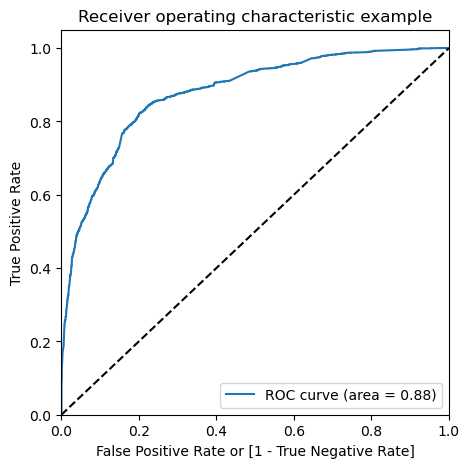

In [83]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Since we have higher (0.88) area under the ROC curve , therefore our model is a good one.

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [84]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.184869,0,1,1,0,0,0,0,0,0,0,0
1,0,0.561082,1,1,1,1,1,1,1,0,0,0,0
2,0,0.115929,0,1,1,0,0,0,0,0,0,0,0
3,1,0.841643,1,1,1,1,1,1,1,1,1,1,0
4,1,0.561130,1,1,1,1,1,1,1,0,0,0,0


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.563848  0.981603  0.302177
0.2   0.2  0.746812  0.887163  0.658899
0.3   0.3  0.798299  0.848733  0.766709
0.4   0.4  0.810109  0.790270  0.822535
0.5   0.5  0.800504  0.669256  0.882714
0.6   0.6  0.792789  0.582993  0.924200
0.7   0.7  0.782396  0.511038  0.952369
0.8   0.8  0.760510  0.421913  0.972599
0.9   0.9  0.711384  0.269011  0.988476


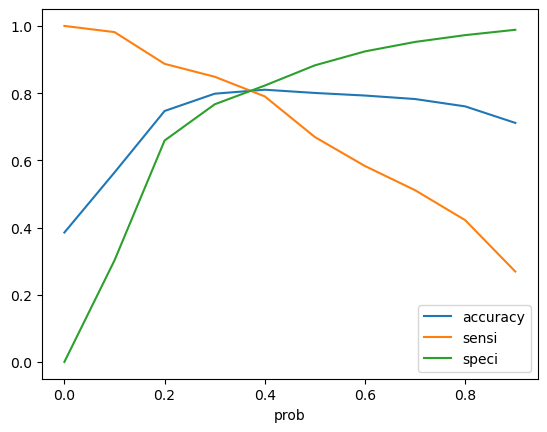

In [86]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [87]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.184869,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.561082,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.115929,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.841643,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.561130,1,1,1,1,1,1,1,0,0,0,0,1


In [88]:
#Assigning Lead Score to the Training data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.184869,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.561082,1,1,1,1,1,1,1,0,0,0,0,1,56
2,0,0.115929,0,1,1,0,0,0,0,0,0,0,0,0,12
3,1,0.841643,1,1,1,1,1,1,1,1,1,1,0,1,84
4,1,0.561130,1,1,1,1,1,1,1,0,0,0,0,1,56


In [89]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8066446228940324

In [90]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion2

array([[3129,  776],
       [ 452, 1994]], dtype=int64)

In [91]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [92]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8152085036794767

In [93]:
# Let us calculate specificity
TN / float(TN+FP)

0.8012804097311139

In [94]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.19871959026888605


In [95]:
# positive predictive value 
print (TP / float(TP+FP))

0.71985559566787


In [96]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8737782742250768


### Precision and Recall 

In [97]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3129,  776],
       [ 452, 1994]], dtype=int64)

Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

In [98]:
# Precision
TP / TP + FP

777.0

In [99]:
# Recall
TP / TP + FN

453.0

### Precision and recall tradeoff

In [100]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: final_predicted, Length: 6351, dtype: int64)

In [101]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

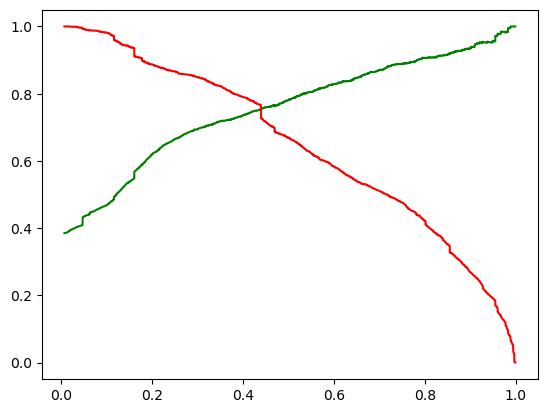

In [102]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [103]:
#Scaling the Test Data set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [104]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,0,1.887326,0,1,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,0,-0.888650,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,0,-0.587751,0,0,1,0,0,0,0,0,0,1,0,0,0


In [105]:
X_test.shape

(2723, 15)

In [106]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2680.4
Date:                Sun, 21 Jan 2024   Deviance:                       5360.8
Time:                        21:59:09   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [107]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

# Check X_test_sm

X_test_sm

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,1.0,0,-0.600595,0,0,0,0,0,0,1,0,0,1,0,0,0
1490,1.0,0,1.887326,0,1,0,0,0,0,0,1,0,1,0,0,0
7936,1.0,0,-0.752879,0,0,0,0,0,0,1,0,0,1,0,0,0
4216,1.0,0,-0.888650,1,0,0,0,0,0,0,0,0,0,1,0,0
3830,1.0,0,-0.587751,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0,0.632357,0,0,0,0,1,0,0,0,0,0,1,0,0
2879,1.0,0,0.192017,0,0,0,0,1,0,0,0,0,0,1,0,0
6501,1.0,0,1.560740,0,1,0,0,0,0,0,0,0,0,0,0,0
7155,1.0,0,0.056246,0,1,0,0,0,0,0,0,0,0,1,0,0


In [108]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

3271    0.201839
1490    0.959816
7936    0.179138
4216    0.801651
3830    0.154782
1800    0.782341
6507    0.526682
4821    0.273347
4223    0.955262
4714    0.115929
dtype: float64

In [109]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
3271,0.201839
1490,0.959816
7936,0.179138
4216,0.801651
3830,0.154782


In [110]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [111]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [112]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [113]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.201839
1,1,0.959816
2,0,0.179138
3,1,0.801651
4,0,0.154782


In [114]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.201839
1,1,0.959816
2,0,0.179138
3,1,0.801651
4,0,0.154782


In [115]:
# Make predictions on the test set using 0.36 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [116]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.201839,0
1,1,0.959816,1
2,0,0.179138,0
3,1,0.801651,1
4,0,0.154782,0


In [117]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.8020565552699229


In [118]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1393,  341],
       [ 198,  791]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7997977755308392

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8033448673587081

In [122]:
#Assigning Lead Score to the Testing data
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

In [123]:
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.184869,0,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.561082,1,1,1,1,1,1,1,0,0,0,0,1,56
2,0,0.115929,0,1,1,0,0,0,0,0,0,0,0,0,12
3,1,0.841643,1,1,1,1,1,1,1,1,1,1,0,1,84
4,1,0.561130,1,1,1,1,1,1,1,0,0,0,0,1,56


### Observations 

Observations:
After running the model on the Test Data , we obtain:

Accuracy : 80.20 %
Sensitivity : 79.98 %
Specificity : 80.33 %

1.Comparing the values obtained for Train & Test:

Train Data Results
Accuracy : 80.66 %
Sensitivity : 81.52 %
Specificity : 80.12 %


Test Data Results
Accuracy : 80.20 %
Sensitivity : 79.98 %
Specificity : 80.33 %

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the ConversionRate very well and we should be able to give the CEO confidence in making good calls based on
this model to get a higher lead conversion rate of 80%.

2) Finding out the leads which should be contacted:
The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

In [124]:
hot_leads=y_train_pred_final.loc[y_train_pred_final["Lead_Score"]>=85]
hot_leads

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
7,1,0.929563,1,1,1,1,1,1,1,1,1,1,1,1,93
14,1,0.939009,1,1,1,1,1,1,1,1,1,1,1,1,94
29,1,0.855168,1,1,1,1,1,1,1,1,1,1,0,1,86
42,1,0.914848,1,1,1,1,1,1,1,1,1,1,1,1,91
43,1,0.984331,1,1,1,1,1,1,1,1,1,1,1,1,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,1,0.978575,1,1,1,1,1,1,1,1,1,1,1,1,98
6331,0,0.899732,1,1,1,1,1,1,1,1,1,1,0,1,90
6342,1,0.855031,1,1,1,1,1,1,1,1,1,1,0,1,86
6344,1,0.997155,1,1,1,1,1,1,1,1,1,1,1,1,100


So there are 960 leads which can be contacted and have a high chance of getting converted.

3) Finding out the Important Features from our final model:

In [125]:
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.305785
What is your current occupation_Working Professional    2.675591
Lead Source_Welingak Website                            2.132138
Total Time Spent on Website                             0.967666
const                                                   0.737714
Specialization_Others                                  -0.122415
Lead Source_Organic Search                             -0.457579
Lead Source_Direct Traffic                             -0.657380
Last Activity_Olark Chat Conversation                  -0.983967
Last Activity_Converted to Lead                        -1.093978
Last Notable Activity_Email Opened                     -1.408962
Last Notable Activity_Olark Chat Conversation          -1.474921
Last Notable Activity_Page Visited on Website          -1.718877
Last Notable Activity_Email Link Clicked               -1.734378
Last Notable Activity_Modified                         -1.786941
Do Not Email             